In [205]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import KMeans
from sklearn import datasets
from sklearn.preprocessing import MinMaxScaler

In [206]:
data = pd.read_csv('../datasets/wine/winequality-red.csv', sep=";")
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [207]:
data.describe(include='all')

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


(array([ 10.,   0.,  53.,   0., 681.,   0., 638.,   0., 199.,  18.]),
 array([3. , 3.5, 4. , 4.5, 5. , 5.5, 6. , 6.5, 7. , 7.5, 8. ]),
 <a list of 10 Patch objects>)

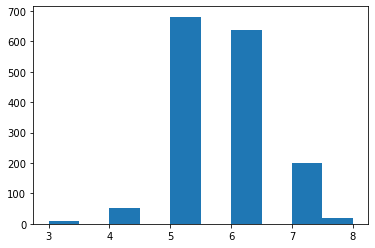

In [208]:
plt.hist(data['quality'])

ya se pueden realizar los primeros análisis:
* volatile acidity: mientras más alto es este valor, tiene menos calificación
* chlorides: idem al anterior
* citric acid: a mayor acidez, mayor calificación

In [209]:
data.groupby("quality").mean()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
quality,,,,,,,,,,,
3,8.360000,0.884500,0.171000,2.635000,0.122500,11.000000,24.900000,0.997464,3.398000,0.570000,9.955000
4,7.779245,0.693962,0.174151,2.694340,0.090679,12.264151,36.245283,0.996542,3.381509,0.596415,10.265094
5,8.167254,0.577041,0.243686,2.528855,0.092736,16.983847,56.513950,0.997104,3.304949,0.620969,9.899706
6,8.347179,0.497484,0.273824,2.477194,0.084956,15.711599,40.869906,0.996615,3.318072,0.675329,10.629519
7,8.872362,0.403920,0.375176,2.720603,0.076588,14.045226,35.020101,0.996104,3.290754,0.741256,11.465913
8,8.566667,0.423333,0.391111,2.577778,0.068444,13.277778,33.444444,0.995212,3.267222,0.767778,12.094444


## Normalización manual
* df_norm = (data-data.mean()) / (data.max()-data.min())
* df_norm.head()

**aquí aplico un min_max_sacler**

In [210]:
scaler = MinMaxScaler()
scaler.fit_transform(df_norm)

array([[4.69259011e-08, 5.14200665e-07, 3.64338572e-04, ...,
        1.13543518e-05, 6.00000000e-01, 0.00000000e+00],
       [4.87621069e-10, 1.57541076e-04, 3.64338572e-04, ...,
        1.13543518e-05, 6.00000000e-01, 0.00000000e+00],
       [4.87621069e-10, 5.62175785e-06, 1.01529562e-04, ...,
        1.13543518e-05, 6.00000000e-01, 0.00000000e+00],
       ...,
       [2.53902582e-05, 6.77084564e-15, 1.95530894e-06, ...,
        0.00000000e+00, 1.00000000e+00, 6.00000000e-01],
       [1.07766115e-04, 2.36643238e-08, 3.38312366e-06, ...,
        1.13543518e-05, 1.00000000e+00, 6.00000000e-01],
       [7.68848425e-05, 3.37342892e-06, 3.08541758e-05, ...,
        0.00000000e+00, 8.00000000e-01, 8.00000000e-01]])

**lo elevo a la potencia, para eliminar cualquier negativo**

In [211]:
df_norm = df_norm**2

In [212]:
df_norm.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,labels_h,labels_k
count,1.599000e+03,1.599000e+03,1.599000e+03,1.599000e+03,1.599000e+03,1.599000e+03,1.599000e+03,1.599000e+03,1.599000e+03,1.599000e+03,1.599000e+03,1.599000e+03,1599.000000,1599.000000
mean,3.381336e-06,3.408198e-06,4.073545e-06,2.968147e-04,1.439935e-04,2.616127e-05,7.815071e-05,7.241552e-08,9.710489e-08,5.454870e-05,1.967369e-06,2.936164e-07,8.671044,7.916198
std,5.847135e-05,1.324140e-04,1.592032e-04,5.998284e-03,4.038298e-03,6.403968e-04,2.344339e-03,9.172330e-07,2.506977e-06,1.121707e-03,6.432620e-05,2.879290e-06,8.073852,8.624657
min,6.919008e-45,6.081678e-46,6.736249e-49,1.427011e-50,1.834073e-50,8.605397e-45,3.106470e-45,1.559923e-58,1.214186e-49,5.195513e-48,5.969368e-40,6.218309e-19,0.000000,0.000000
25%,2.343889e-21,1.171409e-22,2.654858e-19,6.817192e-29,4.012924e-32,6.195460e-21,5.285599e-23,2.499796e-23,2.323843e-23,2.279870e-25,1.034082e-19,6.218309e-19,1.000000,0.000000
50%,8.629437e-17,5.785316e-18,4.438028e-13,1.183768e-23,1.349913e-27,5.245736e-16,2.491056e-18,4.808067e-18,1.825383e-18,2.026280e-20,4.361552e-15,4.699371e-15,9.000000,4.000000
75%,2.044100e-13,1.290314e-14,1.292913e-10,4.125614e-21,1.571109e-23,9.176662e-14,9.298943e-16,5.133667e-14,9.564713e-15,2.183867e-17,6.300252e-13,4.699371e-15,16.000000,16.000000
max,1.681840e-03,5.294093e-03,6.366092e-03,1.488246e-01,1.159530e-01,2.324758e-02,8.466965e-02,2.080856e-05,7.073753e-05,3.018603e-02,2.565701e-03,3.561769e-05,25.000000,25.000000


## Cluster jerárquico con AgglomerativeClustering

In [213]:
clust = AgglomerativeClustering(n_clusters=6, linkage='ward').fit(df_norm)

**inserto las labels en un Series**

In [214]:
md_h = pd.Series(clust.labels_)

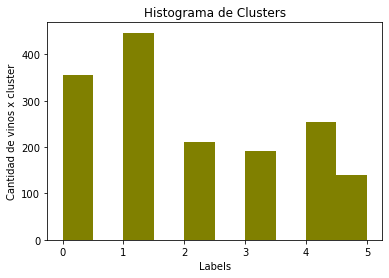

In [215]:
plt.hist(md_h, color='olive')
plt.title('Histograma de Clusters')
plt.xlabel('Labels')
plt.ylabel('Cantidad de vinos x cluster')
plt.show()

**en el primer histograma (obtenido directamente del dataframe) tenemos una distribución muy distinta a la que nos arroja el histograma luego del clustering: a) este último es más homogéneo, b) tiene muchos vinos catalogados como "malos" y la etiqueta 2 contiene a la gran mayoría de los vinos**
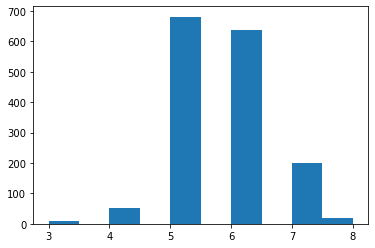

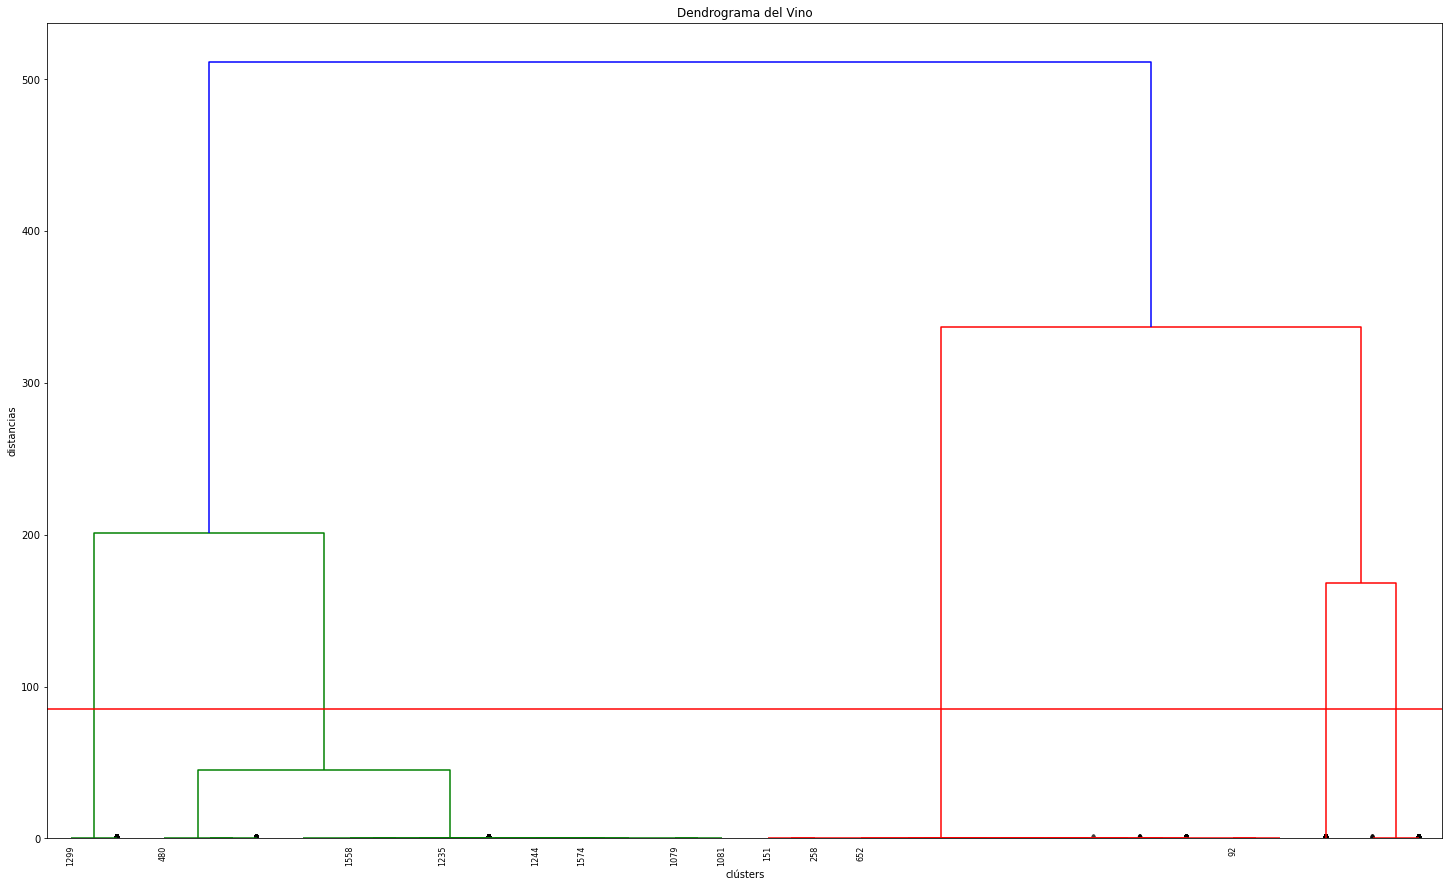

In [216]:
z = linkage(df_norm, method='ward')
plt.figure(figsize=(25,15))
plt.title('Dendrograma del Vino')
plt.xlabel('clústers')
plt.ylabel('distancias')
plt.axhline(y=85, c='red')
dendrogram(z, leaf_rotation=90., leaf_font_size=8., truncate_mode='lastp', show_leaf_counts=False,
          show_contracted=True)
plt.show()

## KMeans

In [217]:
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(df_norm)
    wcss.append(kmeans.inertia_)

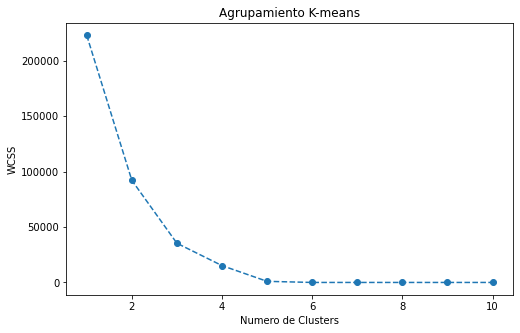

In [218]:
plt.figure(figsize = (8,5))
plt.plot(range(1, 11), wcss, marker = 'o', linestyle = '--')
plt.xlabel('Numero de Clusters')
plt.ylabel('WCSS')
plt.title('Agrupamiento K-means')
plt.show()

In [219]:
model_k = KMeans(n_clusters=6, random_state=666)
model_k.fit(df_norm)

KMeans(n_clusters=6, random_state=666)

In [220]:
md_k = pd.Series(model_k.labels_)

**agrego las DOS labels al dataframe: el modelo hierarchy y el kmeans**

In [221]:
df_norm['labels_h'] = md_h
df_norm['labels_k'] = md_k

In [222]:
df_norm.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,labels_h,labels_k
0,3.703480e-18,1.399771e-15,8.450516e-10,1.804067e-22,3.251547e-28,2.439770e-19,2.013956e-22,1.637333e-18,1.308688e-13,2.026280e-20,1.416713e-13,4.699371e-15,1,1
1,3.998984e-22,1.313951e-10,8.450516e-10,9.073026e-39,8.361931e-29,5.541814e-15,5.893691e-19,3.044501e-39,1.178666e-17,7.381208e-31,5.069985e-17,4.699371e-15,1,1
2,3.998984e-22,1.673154e-13,6.562328e-11,2.624603e-29,1.158897e-34,2.827317e-31,6.341231e-26,2.050693e-28,4.738807e-23,1.032932e-37,5.069985e-17,4.699371e-15,1,1
3,3.176141e-10,4.748433e-13,2.371111e-09,1.804067e-22,1.239101e-27,1.580482e-29,7.469912e-22,2.643397e-17,1.614279e-15,5.288071e-22,5.069985e-17,6.218309e-19,2,0
4,3.703480e-18,1.399771e-15,8.450516e-10,1.804067e-22,3.251547e-28,2.439770e-19,2.013956e-22,1.637333e-18,1.308688e-13,2.026280e-20,1.416713e-13,4.699371e-15,1,1


### ya tengo en el dataframe las etiquetas del modelo jerárquico y de kmeans. ahora comparo con una distribución cómo quedan ambos:

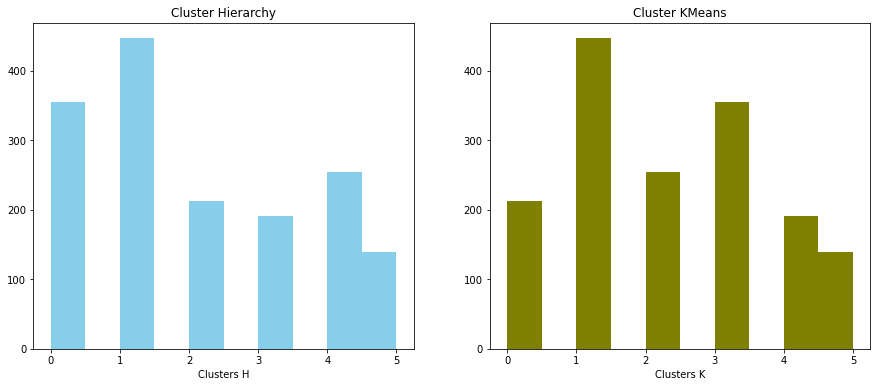

In [223]:
fig, ax = plt.subplots(1, 2) #creo el marco: una fila con dos columnas
fig.set_size_inches(15,6) #seteo el tamaño
ax[0].hist(df_norm['labels_h'], color='skyblue') #seteo al 1er gráfico (ax[0])
ax[0].set_title('Cluster Hierarchy')
ax[0].set_xlabel('Clusters H')

ax[1].hist(df_norm['labels_k'], color='olive') #seteo al 2do gráfico (ax[1])
ax[1].set_title('Cluster KMeans')
ax[1].set_xlabel('Clusters K')
plt.show()


## otro análisis

In [224]:
df_analisis = df_norm.groupby('labels_h').mean()
df_analisis['cant_vinos'] = df_norm[['labels_h','pH']].groupby(['labels_h']).count()
df_analisis['%_cant'] = df_analisis['cant_vinos'] / df_analisis['cant_vinos'].sum() * 100
df_analisis

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,labels_k,cant_vinos,%_cant
labels_h,,,,,,,,,,,,,,,
0,3.550871e-11,2.914165e-08,6.460326e-08,9.167726e-04,6.326950e-13,1.177904e-04,3.520081e-04,1.704559e-07,9.070892e-13,1.443481e-10,4.868012e-08,1.008354e-07,3,355,22.201376
1,2.744627e-11,1.216823e-05,4.506275e-09,3.904406e-13,1.342822e-09,3.956128e-12,1.738345e-12,1.679927e-12,1.279196e-10,2.222342e-14,1.700304e-08,5.730416e-07,1,447,27.954972
2,2.550295e-05,3.980909e-12,3.052613e-05,1.508484e-10,1.086056e-03,1.446034e-11,1.315509e-10,1.198908e-07,1.437688e-08,4.114263e-04,1.211664e-05,2.982942e-08,0,212,13.258286
3,3.745883e-10,5.924121e-10,1.692480e-09,4.233261e-10,6.300508e-09,8.004175e-08,2.055475e-13,2.490390e-08,7.964467e-07,4.710055e-13,2.416758e-06,1.308460e-07,4,191,11.944966
4,2.971372e-12,2.165806e-11,5.158046e-09,6.626961e-09,4.974475e-13,3.796184e-09,3.459341e-10,8.739853e-08,1.698714e-10,3.748279e-09,3.553088e-07,2.938536e-07,2,255,15.947467
5,2.458775e-10,3.387831e-10,1.113095e-07,1.073026e-03,6.744319e-12,1.194327e-10,3.329285e-14,2.028569e-08,4.815121e-12,1.107775e-12,5.980966e-11,5.129386e-07,5,139,8.692933
